# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from scipy.stats import sem
from matplotlib.pyplot import pie, axis, show



# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [57]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [68]:
#add url, add city name, but create a loop so it loops through all 600 cities 

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="


In [70]:
#need city, lat, lng, max temp, humidity, cloudiness, wind speed, country, date 

#setting lists 
cities_found = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind = []
country = []
date = []

for city in cities: 
    response = requests.get(query_url + city)
    response_json = response.json() 
    try:
        lat.append(response_json['coord']['lat'])
        lng.append(response_json['coord']['lon'])
        max_temp.append(response_json['main']['temp_max'])
        humidity.append(response_json['main']['humidity'])
        cloudiness.append(response_json['clouds']['all'])
        wind.append(response_json['wind']['speed'])
        country.append(response_json['sys']['country'])
        cities_found.append(city)
        date.append(response_json['dt'])
    except:
        print("Couldnt find " + city)
   

Couldnt find mys shmidta
Couldnt find cumaribo
Couldnt find illoqqortoormiut
Couldnt find sorvag
Couldnt find sentyabrskiy
Couldnt find armacao dos buzios
Couldnt find amderma
Couldnt find barentsburg
Couldnt find attawapiskat
Couldnt find vaitupu
Couldnt find tabiauea
Couldnt find umm durman
Couldnt find mentok
Couldnt find belushya guba
Couldnt find taolanaro
Couldnt find grand river south east
Couldnt find samusu
Couldnt find formoso do araguaia
Couldnt find palabuhanratu
Couldnt find koboldo
Couldnt find meyungs
Couldnt find warqla
Couldnt find kamenskoye
Couldnt find talesh
Couldnt find tsihombe
Couldnt find umzimvubu
Couldnt find utiroa
Couldnt find one hundred mile house
Couldnt find ondorhaan
Couldnt find grand centre
Couldnt find lolua
Couldnt find samalaeulu
Couldnt find abu jubayhah
Couldnt find nizhneyansk
Couldnt find coulihaut
Couldnt find ruatoria
Couldnt find sataua
Couldnt find bolungarvik
Couldnt find marcona
Couldnt find eldikan
Couldnt find burica
Couldnt find mocam

In [73]:
weather_cities = pd.DataFrame({ "City": cities_found, "Latitude" : lat, "Longitude": lng, "Max Temp (Celsius)": max_temp, "Humidity": humidity,
                               "Cloudiness": cloudiness, "Wind Speed": wind, "Country": country, "Date": date
    
    
    
})



In [74]:
weather_cities

,City,Latitude,Longitude,Max Temp (Celsius),Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,-21.00,77,75,2.57,CA,1613452007
1,tasiilaq,65.6145,-37.6368,-3.00,80,90,0.41,GL,1613451787
2,katherine,-14.4667,132.2667,32.00,66,40,1.03,AU,1613452007
3,jamestown,42.0970,-79.2353,-5.00,93,90,7.20,US,1613452008
4,safford,32.8340,-109.7076,6.67,70,1,2.57,US,1613452008
...,...,...,...,...,...,...,...,...,...
575,sao gabriel da cachoeira,-0.1303,-67.0892,23.73,93,82,0.42,BR,1613452172
576,kapoeta,4.7717,33.5903,29.78,30,65,10.41,SS,1613452190
577,kankon,15.0167,74.0167,25.00,83,20,2.57,IN,1613452190
578,vestmannaeyjar,63.4427,-20.2734,6.32,78,43,3.82,IS,1613452153


In [75]:
weather_cities.to_csv(output_data_file)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [76]:
weather_cities.head()

,City,Latitude,Longitude,Max Temp (Celsius),Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,-21.00,77,75,2.57,CA,1613452007
1,tasiilaq,65.6145,-37.6368,-3.00,80,90,0.41,GL,1613451787
2,katherine,-14.4667,132.2667,32.00,66,40,1.03,AU,1613452007
3,jamestown,42.0970,-79.2353,-5.00,93,90,7.20,US,1613452008
4,safford,32.8340,-109.7076,6.67,70,1,2.57,US,1613452008


In [77]:
weather_cities.describe()

,Latitude,Longitude,Max Temp (Celsius),Humidity,Cloudiness,Wind Speed,Date
count,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,5.800000e+02
mean,19.768360,20.388687,9.972966,72.108621,52.124138,3.471914,1.613452e+09
std,33.087170,90.071891,17.969437,20.695262,39.878682,2.446060,7.742916e+01
min,-54.800000,-175.200000,-33.620000,10.000000,0.000000,0.050000,1.613452e+09
25%,-6.848625,-58.550450,-3.620000,61.000000,7.000000,1.547500,1.613452e+09
50%,24.139000,25.336300,15.055000,78.000000,58.000000,3.010000,1.613452e+09
75%,47.704225,98.344800,24.630000,88.000000,90.000000,4.630000,1.613452e+09
max,78.218600,179.316700,38.000000,100.000000,100.000000,14.400000,1.613452e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#no cities with humidity over 100 as the max humidity was reported to be 100 in the table above

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

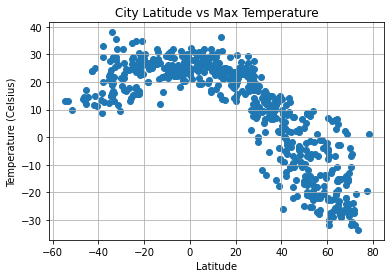

In [79]:
plt.scatter(weather_cities["Latitude"], weather_cities["Max Temp (Celsius)"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureVLatitude.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

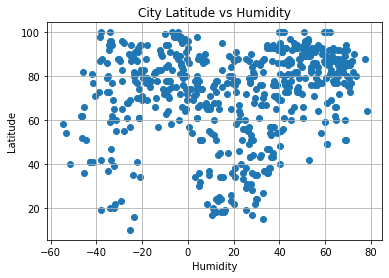

In [80]:
plt.scatter(weather_cities["Latitude"], weather_cities["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.ylabel("Latitude")
plt.xlabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVHumidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

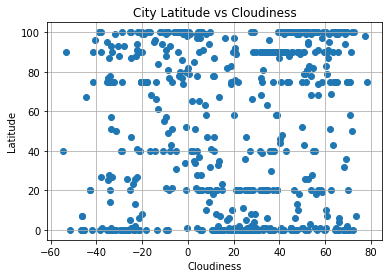

In [81]:
plt.scatter(weather_cities["Latitude"], weather_cities["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Latitude")
plt.xlabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVCloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

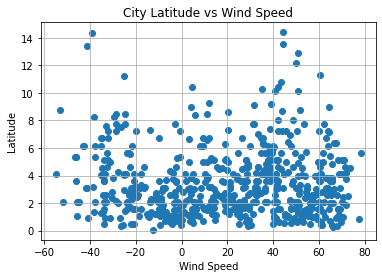

In [82]:
plt.scatter(weather_cities["Latitude"], weather_cities["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Latitude")
plt.xlabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVWindSpeed.png")

# Show plot
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [89]:
northern_df = weather_cities.loc[weather_cities["Latitude"] > 0]

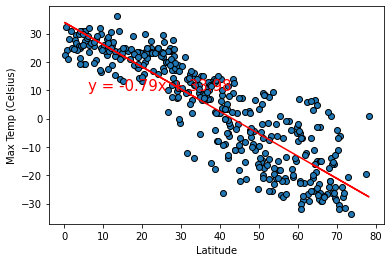

The r value is: -0.8748476993426599
The regression equation is y = -0.79x + 33.98


In [90]:
y_values = northern_df["Max Temp (Celsius)"]
x_values = northern_df["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 



line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.ylabel("Max Temp (Celsius)")
plt.xlabel("Latitude")
plt.annotate(line_eq, (6,10), fontsize = 15, color = "red")

plt.show()
print(f"The r value is: {rvalue}")
print(f'The regression equation is {line_eq}')

The r-value is: 0.46937863826630627


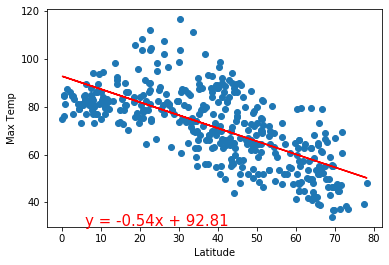

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [91]:
southern_df = weather_cities.loc[weather_cities["Latitude"] < 0]

In [92]:
southern_df.head()

,City,Latitude,Longitude,Max Temp (Celsius),Humidity,Cloudiness,Wind Speed,Country,Date
2,katherine,-14.4667,132.2667,32.00,66,40,1.03,AU,1613452007
7,punta arenas,-53.1500,-70.9167,13.00,54,90,8.75,CL,1613451998
10,geraldton,-28.7667,114.6000,27.00,65,40,7.20,AU,1613452010
11,teahupoo,-17.8333,-149.2667,27.00,69,75,4.12,PF,1613452010
13,mayumba,-3.4320,10.6554,25.32,81,100,1.52,GA,1613452011


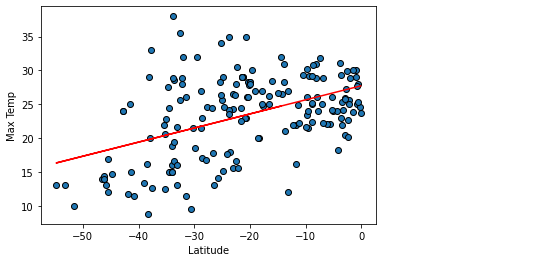

The r value is: 0.4665335550401996
The regression equation is y = 0.21x + 27.73


In [94]:
y_values = southern_df["Max Temp (Celsius)"]
x_values = southern_df["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 



line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.annotate(line_eq, (6,10), fontsize = 15, color = "red")

plt.show()
print(f"The r value is: {rvalue}")
print(f'The regression equation is {line_eq}')

The r-value is: 0.6082708688906918


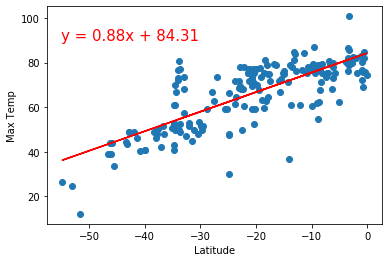

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

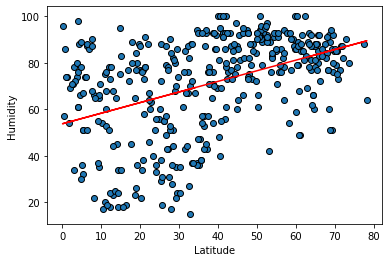

The r value is: 0.43748695703616575
The regression equation is y = 0.46x + 53.74


In [95]:
y_values = northern_df["Humidity"]
x_values = northern_df["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 



line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.annotate(line_eq, (6,10), fontsize = 15, color = "red")

plt.show()
print(f"The r value is: {rvalue}")
print(f'The regression equation is {line_eq}')

The r-value is: 0.000543987878808455


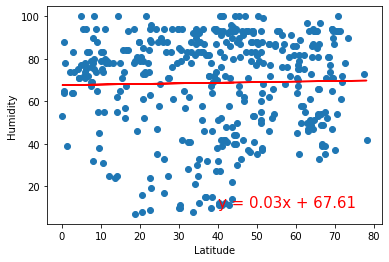

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

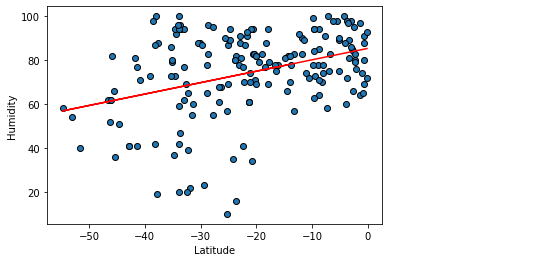

The r value is: 0.36825230282495364
The regression equation is y = 0.52x + 85.35


In [96]:
y_values = southern_df["Humidity"]
x_values = southern_df["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 



line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.annotate(line_eq, (6,10), fontsize = 15, color = "red")

plt.show()
print(f"The r value is: {rvalue}")
print(f'The regression equation is {line_eq}')

The r-value is: 0.014985174297345524


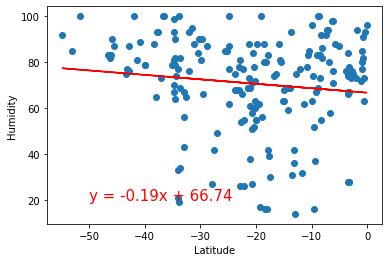

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

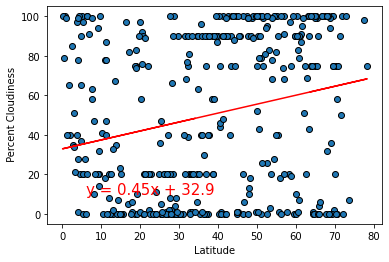

The r value is: 0.2293245323672773
The regression equation is y = 0.45x + 32.9


In [97]:
y_values = northern_df["Cloudiness"]
x_values = northern_df["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 



line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.ylabel(" Percent Cloudiness")
plt.xlabel("Latitude")
plt.annotate(line_eq, (6,10), fontsize = 15, color = "red")

plt.show()
print(f"The r value is: {rvalue}")
print(f'The regression equation is {line_eq}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

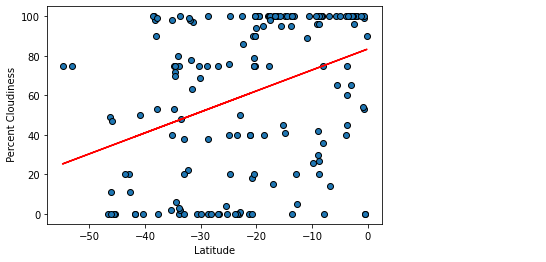

The r value is: 0.3646242417511396
The regression equation is y = 1.06x + 83.45


In [53]:
y_values = southern_df["Cloudiness"]
x_values = southern_df["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 



line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.ylabel(" Percent Cloudiness")
plt.xlabel("Latitude")
plt.annotate(line_eq, (6,10), fontsize = 15, color = "red")

plt.show()
print(f"The r value is: {rvalue}")
print(f'The regression equation is {line_eq}')

The r-value is: 0.0035263772085582894


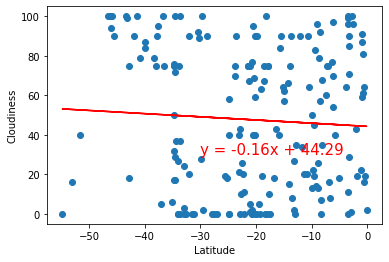

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

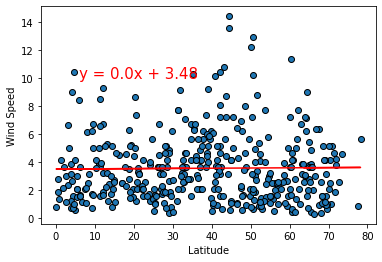

The r value is: 0.011894030126939148
The regression equation is y = 0.0x + 3.48


In [98]:
y_values = northern_df["Wind Speed"]
x_values = northern_df["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 



line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.annotate(line_eq, (6,10), fontsize = 15, color = "red")

plt.show()
print(f"The r value is: {rvalue}")
print(f'The regression equation is {line_eq}')

The r-value is: 0.04019723576144484


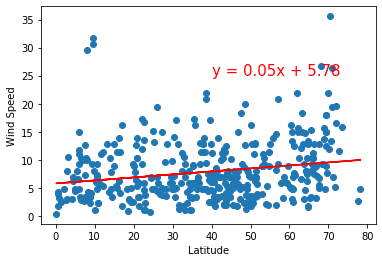

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

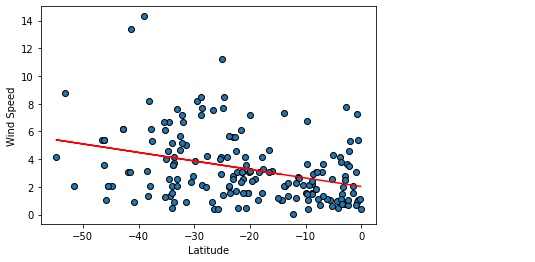

The r value is: -0.3413118332647144
The regression equation is y = -0.06x + 2.03


In [99]:
y_values = southern_df["Wind Speed"]
x_values = southern_df["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 



line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.annotate(line_eq, (6,10), fontsize = 15, color = "red")

plt.show()
print(f"The r value is: {rvalue}")
print(f'The regression equation is {line_eq}')

The r-value is: 0.017128274759839232


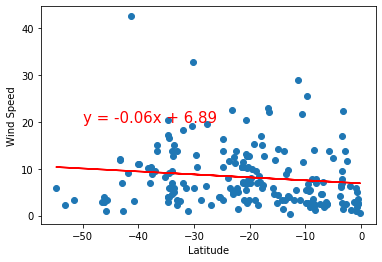